In [13]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label


In [14]:
BATCH_SIZE = 10 # the higher the better
IMG_WIDTH = 128 # for faster computing on kaggle
IMG_HEIGHT = 128 # for faster computing on kaggle
IMG_CHANNELS = 3
TRAIN_PATH = 'D:/MachineLearning/UNet_Type/Quantum_test/data/stage1_train/' # enter correct path to source data
TEST_PATH = 'D:/MachineLearning/UNet_Type/Quantum_test/data/stage1_test/'   # enter correct path to source data
warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42

train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]
np.random.seed(seed)


In [15]:
# preparing arrays for images and masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)


In [16]:
# Getting and resizing train images and masks
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float64)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)#[:,:,:IMG_CHANNELS]
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask


Getting and resizing train images and masks ... 


100%|████████████████████████████████████████████████████████████████████████████████| 670/670 [08:15<00:00,  1.35it/s]


In [11]:
from PIL import Image
path_data_file = 'D:/MachineLearning/UNet_Type/Quantum_test/data5/img_train/' # enter correct path to save prepared data
total_img=len(train_ids)
os.makedirs(path_data_file + "images", exist_ok=True)
os.makedirs(path_data_file + "masks_3chennel", exist_ok=True)
file_name = path_data_file + 'images/X_train'
X_train.tofile(file_name)
Y_train.tofile(path_data_file + 'images/Y_train')


for j in range(total_img):
    img = X_train[j]
    img = Image.fromarray(img)#.convert("RGB")
    mask_ = Y_train[j]
    mask_ = Image.fromarray(mask_)# / np.ndarray.max(mask_) * 255).convert("RGB")
    iss = str(j).zfill(8)
    img.save(path_data_file + 'images/%s.jpg' % iss)
    mask_.save(path_data_file + 'masks_3chennel/%s.jpg' % iss)


In [12]:
# Getting and resizing test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img


Getting and resizing test images ... 


100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [00:02<00:00, 30.35it/s]


In [13]:
path_data_file = 'D:/MachineLearning/UNet_Type/Quantum_test/data5/img_test/' # enter correct path to save prepared data
total_img=len(test_ids)
os.makedirs(path_data_file + "images", exist_ok=True)
X_test.tofile(path_data_file + 'images/X_test')


for j in range(total_img):
    img = X_train[j]
    img = Image.fromarray(img)#.convert("RGB")
    iss = str(j).zfill(8)
    img.save(path_data_file + 'images/%s.jpg' % iss)


Image No.: 102


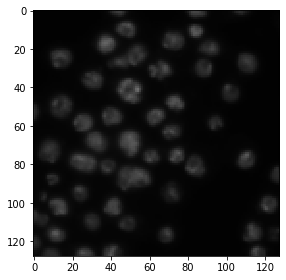

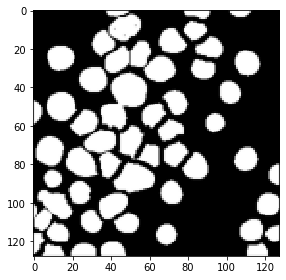

In [17]:
# show the prepared random image and mask
img_num = np.random.randint(X_train.shape[0])
print('Image No.:', img_num)
imshow(X_train[img_num].astype(np.uint8))
plt.show()
imshow(np.squeeze(Y_train[img_num].astype(np.uint8)))
plt.show()


In [9]:
from PIL import Image
import os
path_in = 'D:/MachineLearning/UNet_Type/Quantum_test/data5/img_train/masks_3chennel/'
path_out = 'D:/MachineLearning/UNet_Type/Quantum_test/data5/img_train/masks/'
os.makedirs(path_out, exist_ok=True)
masks_list = os.listdir(path_in)
thresh = 200
fn = lambda x : 255 if x > thresh else 0

for img_mask in masks_list:
    img_current = Image.open(path_in + img_mask)
    img_1chemmel = img_current.convert('L').point(fn, mode='1')
    img_1chemmel.save(path_out + img_mask)